In [1]:
#URL of the page Sarenza with filters baskets/CuirCuir verniCuir / SynthétiqueCuir/TextileNoirA lacetsA scratch / velcro:
url='https://www.sarenza.com/store/product/gender-type/list/view?color=2&gender=1&material=559&material=591&material=790&material=80&sub_type=4&sub_type=6&sub_type=6&type=76'

In [17]:
url

'https://www.sarenza.com/store/product/gender-type/list/view?color=2&gender=1&material=559&material=591&material=790&material=80&sub_type=4&sub_type=6&sub_type=6&type=76'

In [11]:
#Error Handling (simple way)
import requests as r
import requests as r
from bs4 import BeautifulSoup
r.get(url)

<Response [200]>

b'\r\n\r\n<!DOCTYPE html>\r\n<html lang="fr">\r\n<head>\r\n    \r\n\r\n    <title>Chaussures : Sarenza achat et vente de la chaussure en ligne</title>\r\n\r\n    \r\n\r\n\r\n    \r\n\r\n\r\n\r\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\r\n\r\n    <meta name="msvalidate.01" content="CE98FEAA6BE582DA6B81550A02C82727" />\r\n\r\n    <meta name="robots" content="noindex" />\r\n\r\n\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\r\n<meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no, minimal-ui" />\r\n\r\n<meta http-equiv="content-language" content="fr" />\r\n<meta name="language" content="fr" />\r\n\r\n<meta name="description" lang="fr" content="Avec plus de 770 marques et 52 000 mod\xc3\xa8les de chaussures pour femme, homme et enfant, toute la mode est sur Sarenza ! Craquez pour les nouvelles collections UGG, Bensimon, Converse, New Balance, Geox, Kickers et bien d&#39;autres enc
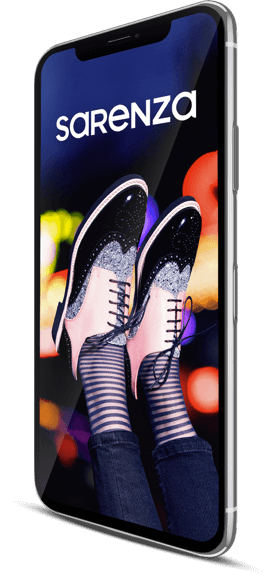

In [12]:
#Error Handling (function)
def func(url, headers={}):
    resp=r.get(url, headers=headers)
    if resp:
        return resp.content
    else:
        print('Sorry, there is an error', resp.status_code,'somewhere')
        return None
func(url)

In [13]:
from requests.exceptions import SSLError, Timeout, TooManyRedirects, RequestException
from contextlib import closing
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings('ignore')
timeout_glob=0.05
verify_glob=True
allow_glob=False
def printmd(string):
    display(Markdown('**'+string+'**'))
def is_good_response(x):
    """
    Returns True if the response seems to be an HTML, False otherwise
    x is response
    """
    content_type=x.headers['Content-Type'].lower()
    return ((x.status_code==200 and content_type is not None and content_type.find('html')>1), x.status_code)
def log_error(e):
    print(e)
def status_handler(status):
    if status<300:
        print('Alles gut!')
    elif status>=400 and status<500:
        print('request has failed due to you mistake bro. Check the link, headers, server and whether you have an access to this page.')
    else:
        print('Yoooo, I have no clue what has happened. But you are stuck, since you didnt receive any output from server')
    return None
def adaptive_scraping(url, timeout=timeout_glob, verify=verify_glob):
    global timeout_glob
    global verify_glob
    global allow_glob
    import requests as r
    try:
        with closing(r.get(url, stream=True, timeout=timeout_glob, verify=verify_glob, allow_redirects=allow_glob)) as resp:
            test1=is_good_response(resp)
            print(resp)
            if test1[0]:
                return resp.content
            else:
                return status_handler(test[1])
    except Timeout as e:
        log_error(f'Error during request to {url}: {str(e)}')
        printmd('We can increase response waiting time. Do you want to continue?')
        ans=input('\n[Yes|No]\t')
        if ans.lower()=='yes':
            timeout_glob*=2
            return adaptive_scraping(url)
        else:
            return None
    except SSLError as e:
        log_error(f'Error during request to {url}: {str(e)}')
        printmd('We can skip verification test. Do you want to continue?')
        ans=input('\n[Yes|No]\t')
        if ans.lower()=='yes':
            verify_glob=False
            return adaptive_scraping(url)
        else:
            return None
    except TooManyRedirects as e:
        log_error(f'Error during request to {url}: {str(e)}')
        printmd('We can increase the number of allowed redirects. Do you want to continue?')
        ans=input('\n[Yes|No]\t')
        if ans.lower()=='yes':
            allow_glob=True
            return adaptive_scraping(url)
        else:
            return None
    except RequestException as e:
        log_error(f'Error during request to {url}: {str(e)}')
        printmd('Unfortunately, we have no clue what to do.  Please try again later. ')
        return None

<Response [200]>


b'\r\n\r\n<!DOCTYPE html>\r\n<html lang="fr">\r\n<head>\r\n    \r\n\r\n    <title>Chaussures : Sarenza achat et vente de la chaussure en ligne</title>\r\n\r\n    \r\n\r\n\r\n    \r\n\r\n\r\n\r\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\r\n\r\n    <meta name="msvalidate.01" content="CE98FEAA6BE582DA6B81550A02C82727" />\r\n\r\n    <meta name="robots" content="noindex" />\r\n\r\n\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\r\n<meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no, minimal-ui" />\r\n\r\n<meta http-equiv="content-language" content="fr" />\r\n<meta name="language" content="fr" />\r\n\r\n<meta name="description" lang="fr" content="Avec plus de 770 marques et 52 000 mod\xc3\xa8les de chaussures pour femme, homme et enfant, toute la mode est sur Sarenza ! Craquez pour les nouvelles collections UGG, Bensimon, Converse, New Balance, Geox, Kickers et bien d&#39;autres enc
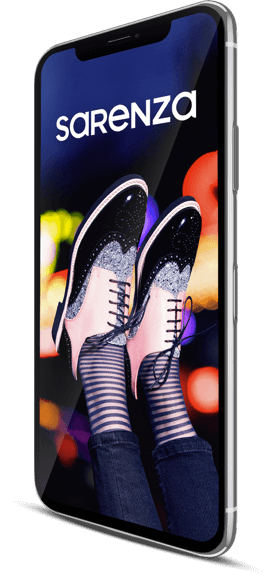

In [14]:
adaptive_scraping(url)


<!DOCTYPE html>

<html lang="fr">
<head>
<title>Chaussures : Sarenza achat et vente de la chaussure en ligne</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="CE98FEAA6BE582DA6B81550A02C82727" name="msvalidate.01"/>
<meta content="noindex" name="robots"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no, minimal-ui" name="viewport"/>
<meta content="fr" http-equiv="content-language"/>
<meta content="fr" name="language"/>
<meta content="Avec plus de 770 marques et 52 000 modèles de chaussures pour femme, homme et enfant, toute la mode est sur Sarenza ! Craquez pour les nouvelles collections UGG, Bensimon, Converse, New Balance, Geox, Kickers et bien d'autres encore. Livraison 24H et retour gratuits !" lang="fr" name="description"/>
<link href="https://cdn.sarenza.net/website/prod/assets/image/favicon.ico?v=20200701104041" rel="icon" t
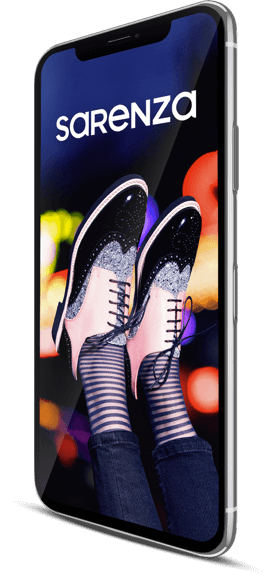

In [16]:
#convert the response into a soup
soup=BeautifulSoup(func(url))
soup